In [1]:
%load_ext watermark
%watermark -u -v -d -p pandas,matplotlib

last updated: 2017-06-03 

CPython 3.6.1
IPython 6.0.0

pandas 0.20.1
matplotlib 2.0.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [3]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

In [4]:
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [5]:
df.shape

(1500, 7)

In [16]:
top_10 = df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})

In [18]:
top_10.head()

,ext price,quantity
name,,
Barton LLC,109438.50,82
"Cronin, Oberbrunner and Spencer",89734.55,67
"Frami, Hills and Schmidt",103569.59,72
"Fritsch, Russel and Anderson",112214.71,81
"Halvorson, Crona and Champlin",70004.36,58


In [19]:
top_10 = top_10.sort_values(by='ext price', ascending=False)

In [20]:
top_10.head()

,ext price,quantity
name,,
Kulas Inc,137351.96,94
White-Trantow,135841.99,86
Trantow-Barrows,123381.38,94
Jerde-Hilpert,112591.43,89
"Fritsch, Russel and Anderson",112214.71,81


In [21]:
top_10 = top_10[:10]
top_10.head()

,ext price,quantity
name,,
Kulas Inc,137351.96,94
White-Trantow,135841.99,86
Trantow-Barrows,123381.38,94
Jerde-Hilpert,112591.43,89
"Fritsch, Russel and Anderson",112214.71,81


In [22]:
top_10 = top_10.reset_index()

In [23]:
top_10

,name,ext price,quantity
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [24]:
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purcheses'}, inplace=True)

In [25]:
top_10

,Name,Sales,Purcheses
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [26]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

In [27]:
plt.style.use('ggplot')

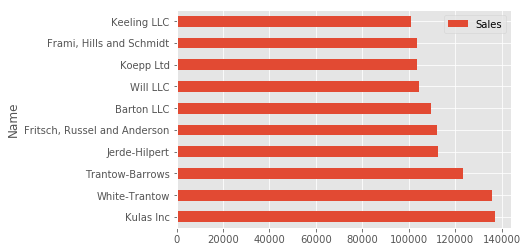

In [28]:
top_10.plot(x='Name', y='Sales', kind='barh')

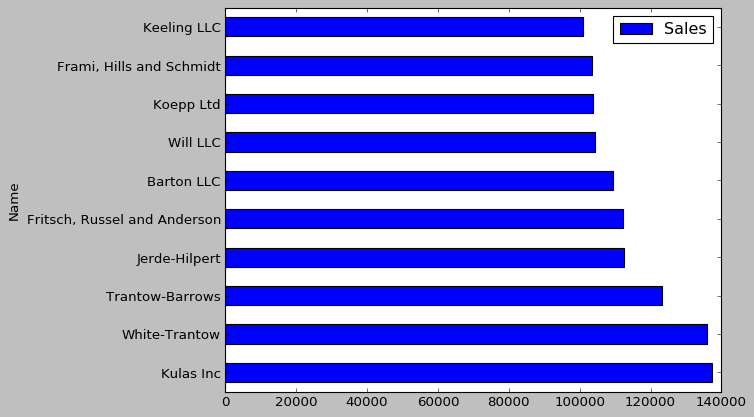

In [29]:
plt.style.use('classic')
top_10.plot(x='Name', y='Sales', kind='barh')

In [30]:
plt.style.use('ggplot')

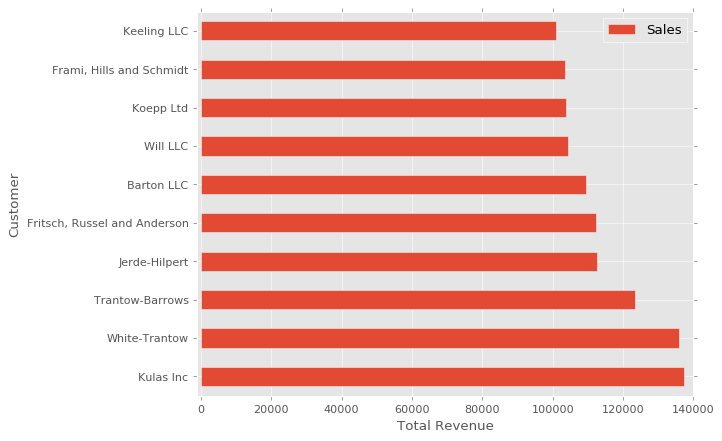

In [32]:
fig, ax = plt.subplots()
top_10.plot(x='Name', y='Sales', kind='barh', ax=ax)
ax.set_xlim([-1000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

 (-10000, 140000),

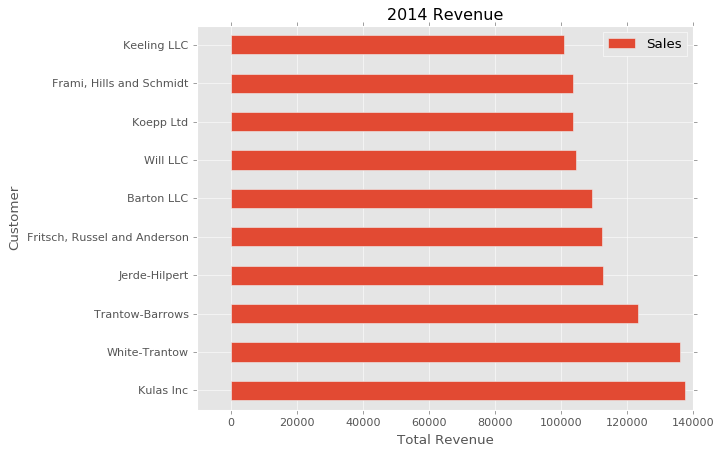

In [33]:
fig, ax = plt.subplots()
top_10.plot(x='Name', y='Sales', kind='barh', ax=ax)
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer', xlim=[-10000, 140000])

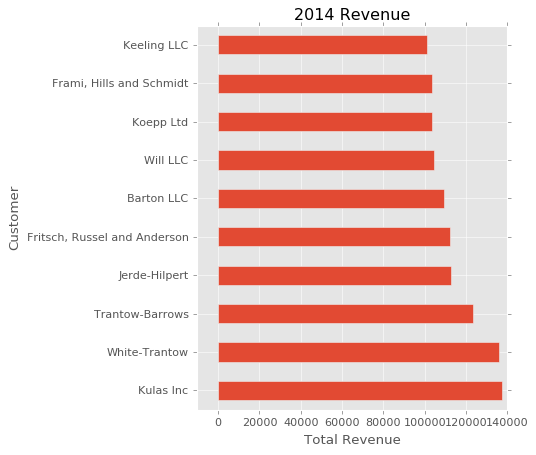

In [35]:
fig, ax = plt.subplots(figsize=(5,6))
top_10.plot(x='Name', y='Sales', kind='barh', ax=ax)
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer', xlim=[-10000, 140000])
ax.legend().set_visible(False)

In [36]:
def currency(x, pos):
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

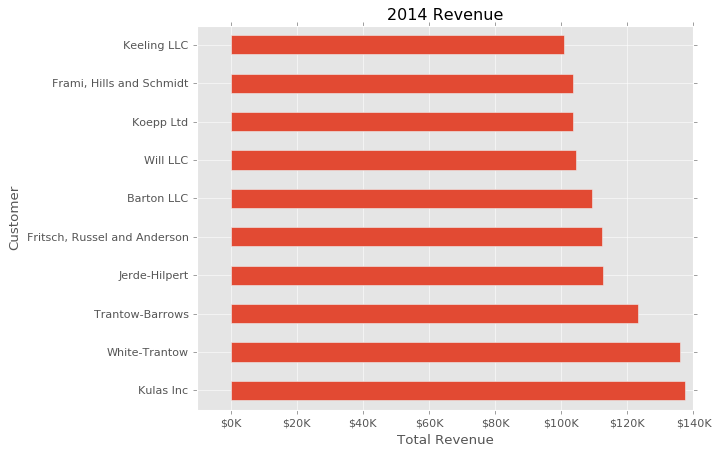

In [38]:
fig, ax = plt.subplots()
top_10.plot(x='Name', y='Sales', kind='barh', ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_title('2014 Revenue')
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

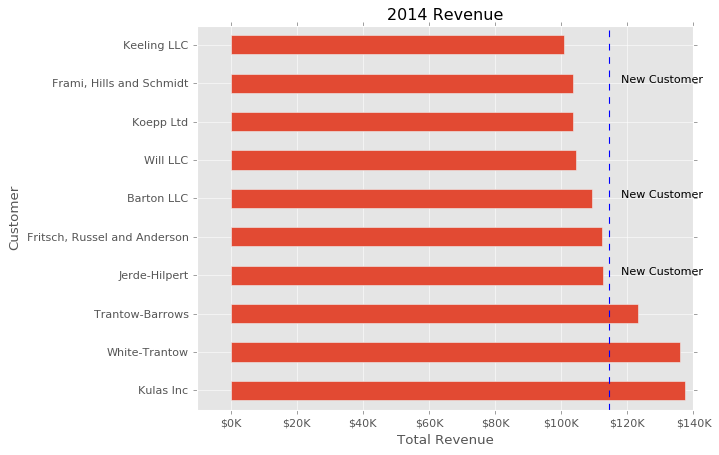

In [47]:
fig, ax = plt.subplots()
top_10.plot(x='Name', y='Sales', kind='barh', ax=ax)
ave = top_10.Sales.mean()
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
ax.axvline(x=ave, c='b', label='Average', ls='--', lw=1)
for cus in [3, 5, 8]:
    ax.text(118000, cus, 'New Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

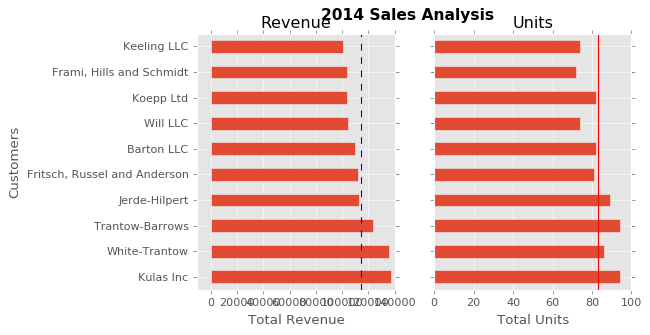

In [55]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,4))
top_10.plot(x='Name', y='Sales', kind='barh', ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

ave = top_10.Sales.mean()
ax0.axvline(x=ave, label='Average', c='b', ls='--', lw=1)

top_10.plot(x='Name', y='Purcheses', kind='barh', ax=ax1)
avg = top_10.Purcheses.mean()
ax1.axvline(x=avg, label='Average', c='r', lw=1, ls='-')
ax1.set(title='Units', xlabel='Total Units', ylabel=' ')

fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

In [56]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}